# [9660] Random Forest 1
Data file:
* sklearn : iris

In [ ]:
from datetime import datetime
print(f'Run time: {datetime.now().strftime("%D %T")}')

Run time: 10/27/24 14:17:06


### Mount your Google Drive
Execute the cell below and carefully follow the instructions

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# The location below is your Google Drive
%cd "/content/gdrive/My Drive/CIS9660"

# The location below is the professor's Google Drive folder for this class
#%cd "/content/gdrive/My Drive/BaruchCollege/Fall 2024/CIS9660_URA_DataMiningForBusinessAnalytics/ColabNotebooks"

/content/gdrive/My Drive/CIS9660


### Import libraries

In [ ]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz

### Load data

In [ ]:
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

### Examine data

In [ ]:
df.shape

(150, 4)

In [ ]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### Instantiate the RandomForestClassifier model

In [ ]:
model = RandomForestClassifier(random_state=42)

### Print RandomForestClassifier default hyperparameters

In [ ]:
print('RandomForestClassifier default hyperparameters\n')
model.get_params()

RandomForestClassifier default hyperparameters



{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

### Fit RandomForestClassifier model using the default hyperparameters

In [ ]:
%%time

model.fit(iris.data, iris.target)

CPU times: user 248 ms, sys: 4.55 ms, total: 253 ms
Wall time: 295 ms


RandomForestClassifier(random_state=42)

### Instantiate the RandomForestClassifier model with different hyperparameters (n_estimators=1000)

In [ ]:
model = RandomForestClassifier(n_estimators=1000, random_state=42)

### Fit RandomForestClassifier model with different hyperparameters (n_estimators=1000)

In [ ]:
%%time

model.fit(iris.data, iris.target)

CPU times: user 1.9 s, sys: 48 ms, total: 1.95 s
Wall time: 2 s


RandomForestClassifier(n_estimators=1000, random_state=42)

### Review decision trees

In [ ]:
# Extract a single decision tree
estimator = model.estimators_[27]

In [ ]:
# Export decision tree as dot file
export_graphviz(estimator, out_file='images/RF_1a.dot',
                feature_names = iris.feature_names,
                class_names = iris.target_names,
                rounded = True, proportion = False,
                precision = 2, filled = True)

In [ ]:
# Convert to png
from subprocess import call
call(['dot', '-Tpng', 'images/RF_1a.dot', '-o', 'images/RF_1a.png', '-Gdpi=600'])

0

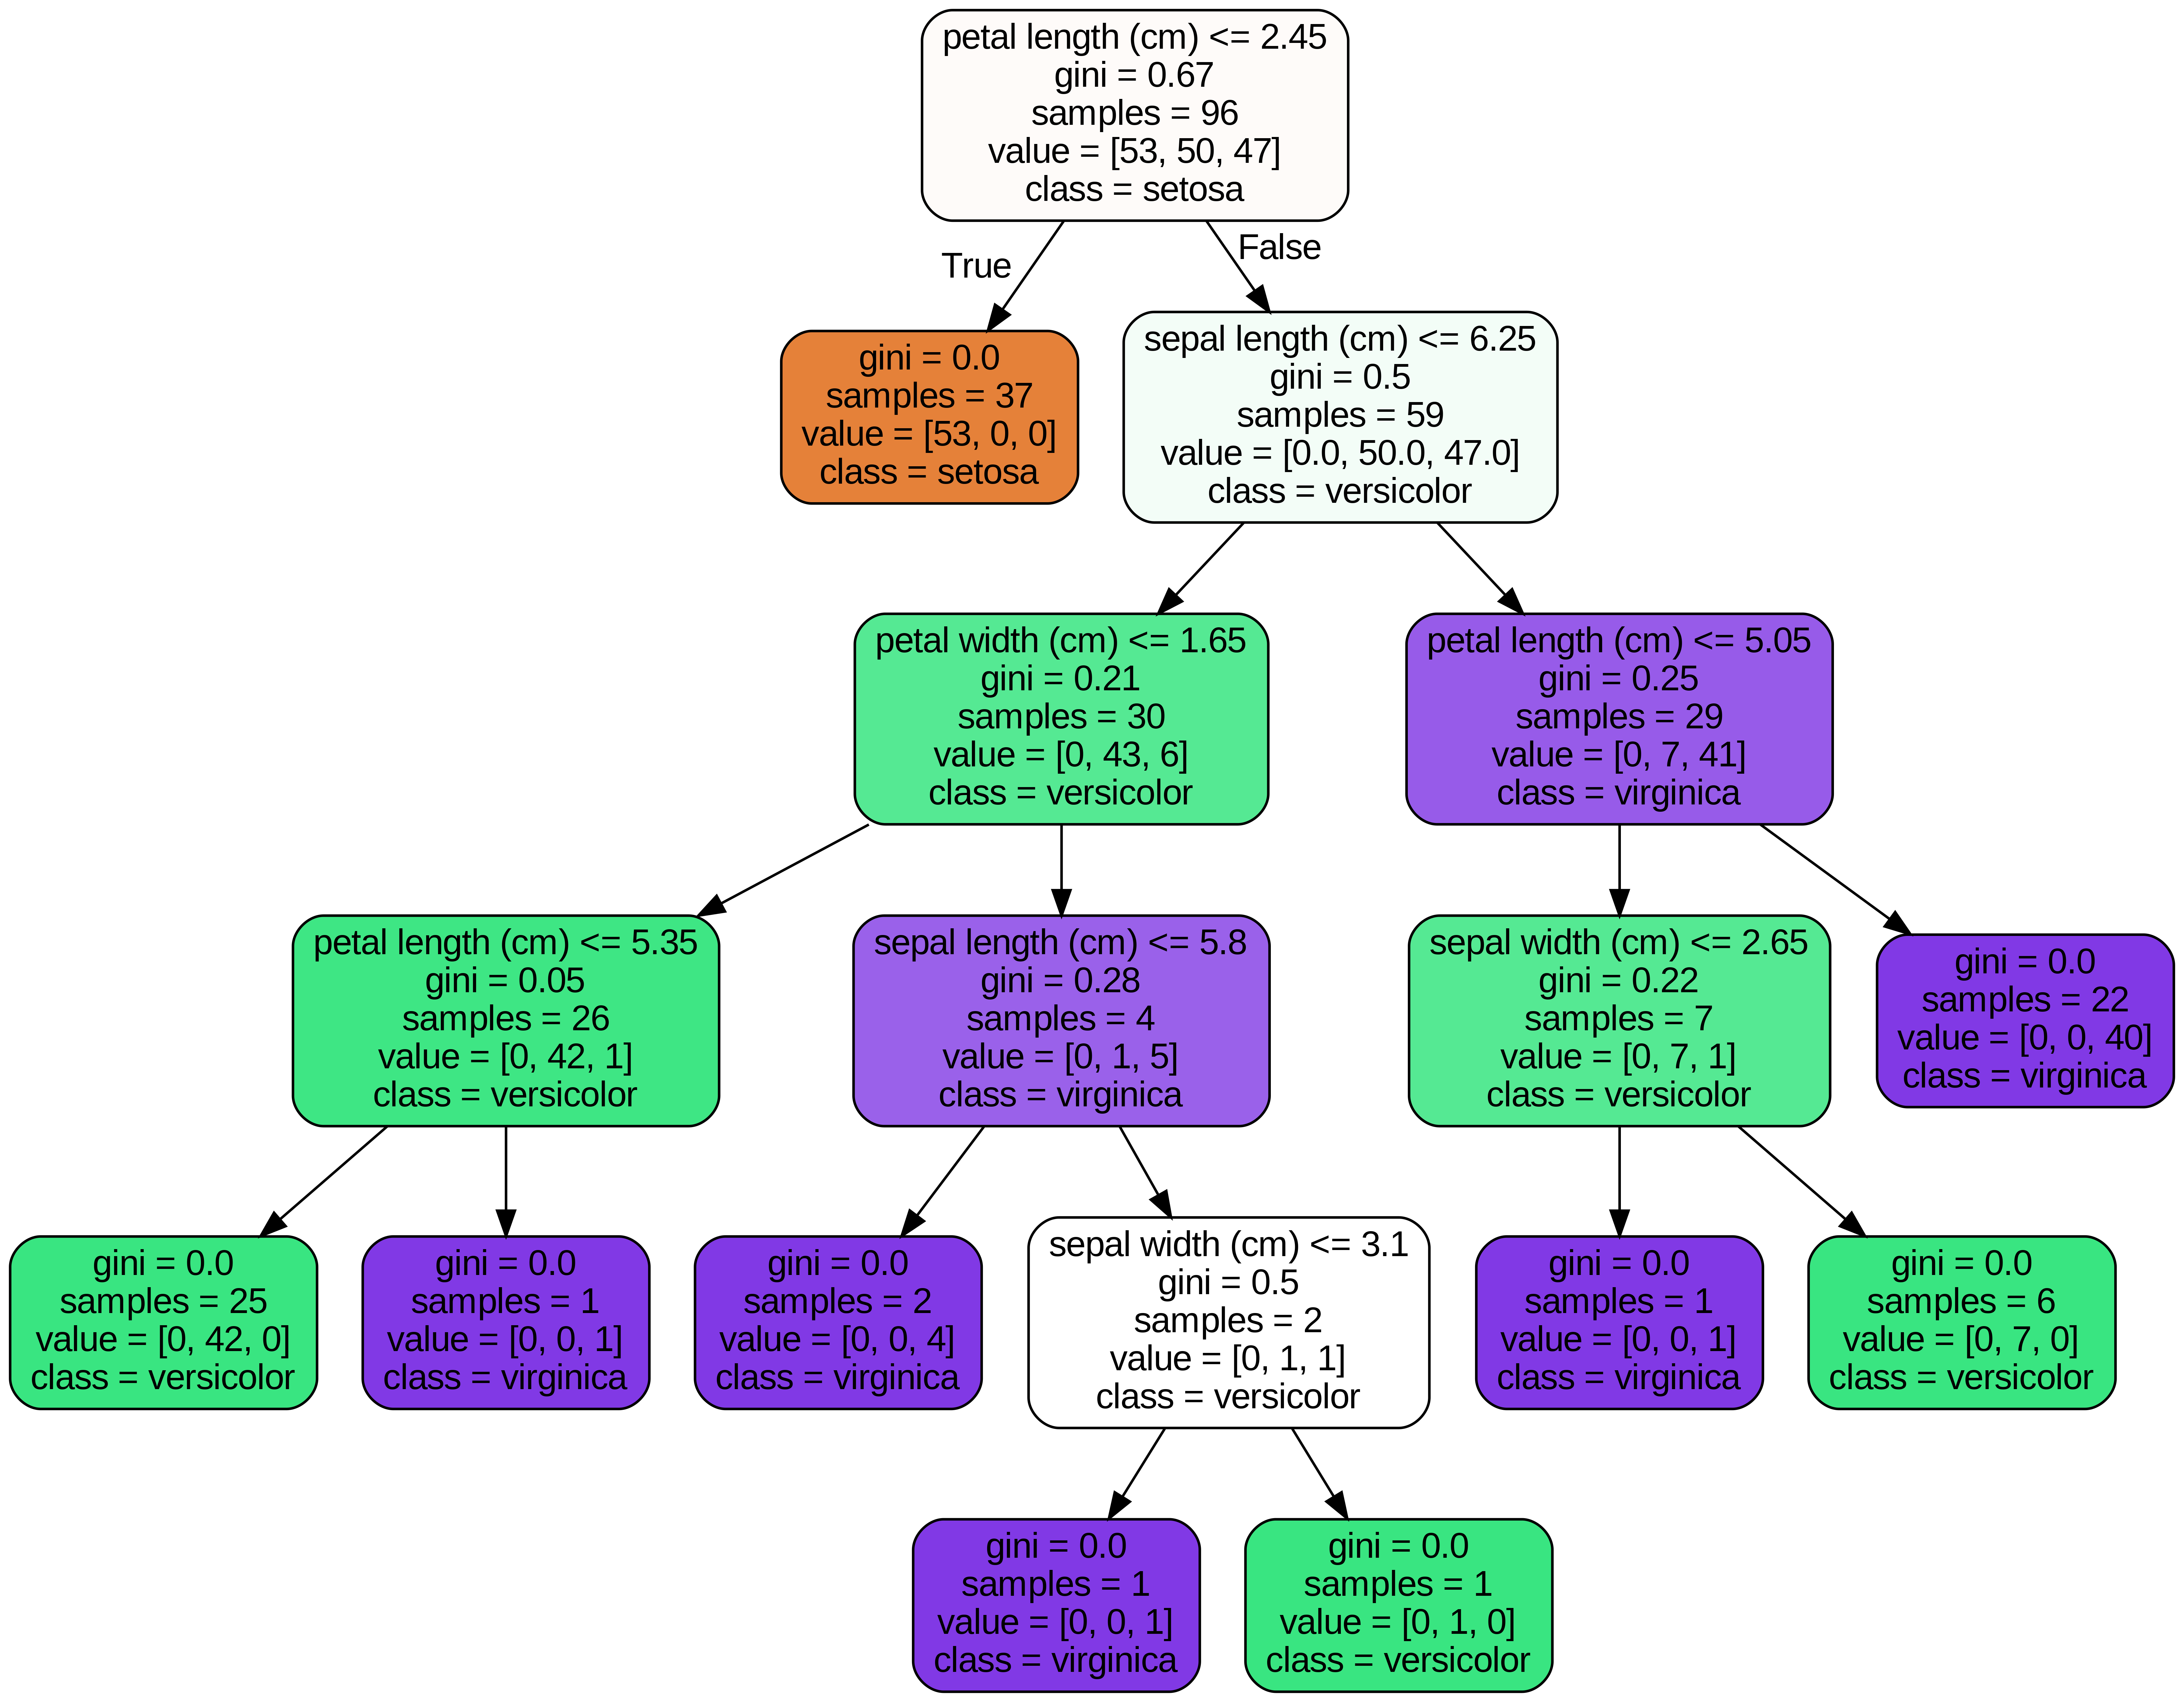

In [ ]:
# Display image
from IPython.display import Image
Image(filename = 'images/RF_1a.png')

In [ ]:
print('The depth of this tree is:', estimator.tree_.max_depth)

The depth of this tree is: 5


In [ ]:
# Extract a different decision tree
estimator = model.estimators_[801]

In [ ]:
# Export decision tree as dot file
export_graphviz(estimator, out_file='images/RF_1b.dot',
                feature_names = iris.feature_names,
                class_names = iris.target_names,
                rounded = True, proportion = False,
                precision = 2, filled = True)

In [ ]:
# Convert to png
from subprocess import call
call(['dot', '-Tpng', 'images/RF_1b.dot', '-o', 'images/RF_1b.png', '-Gdpi=600'])

0

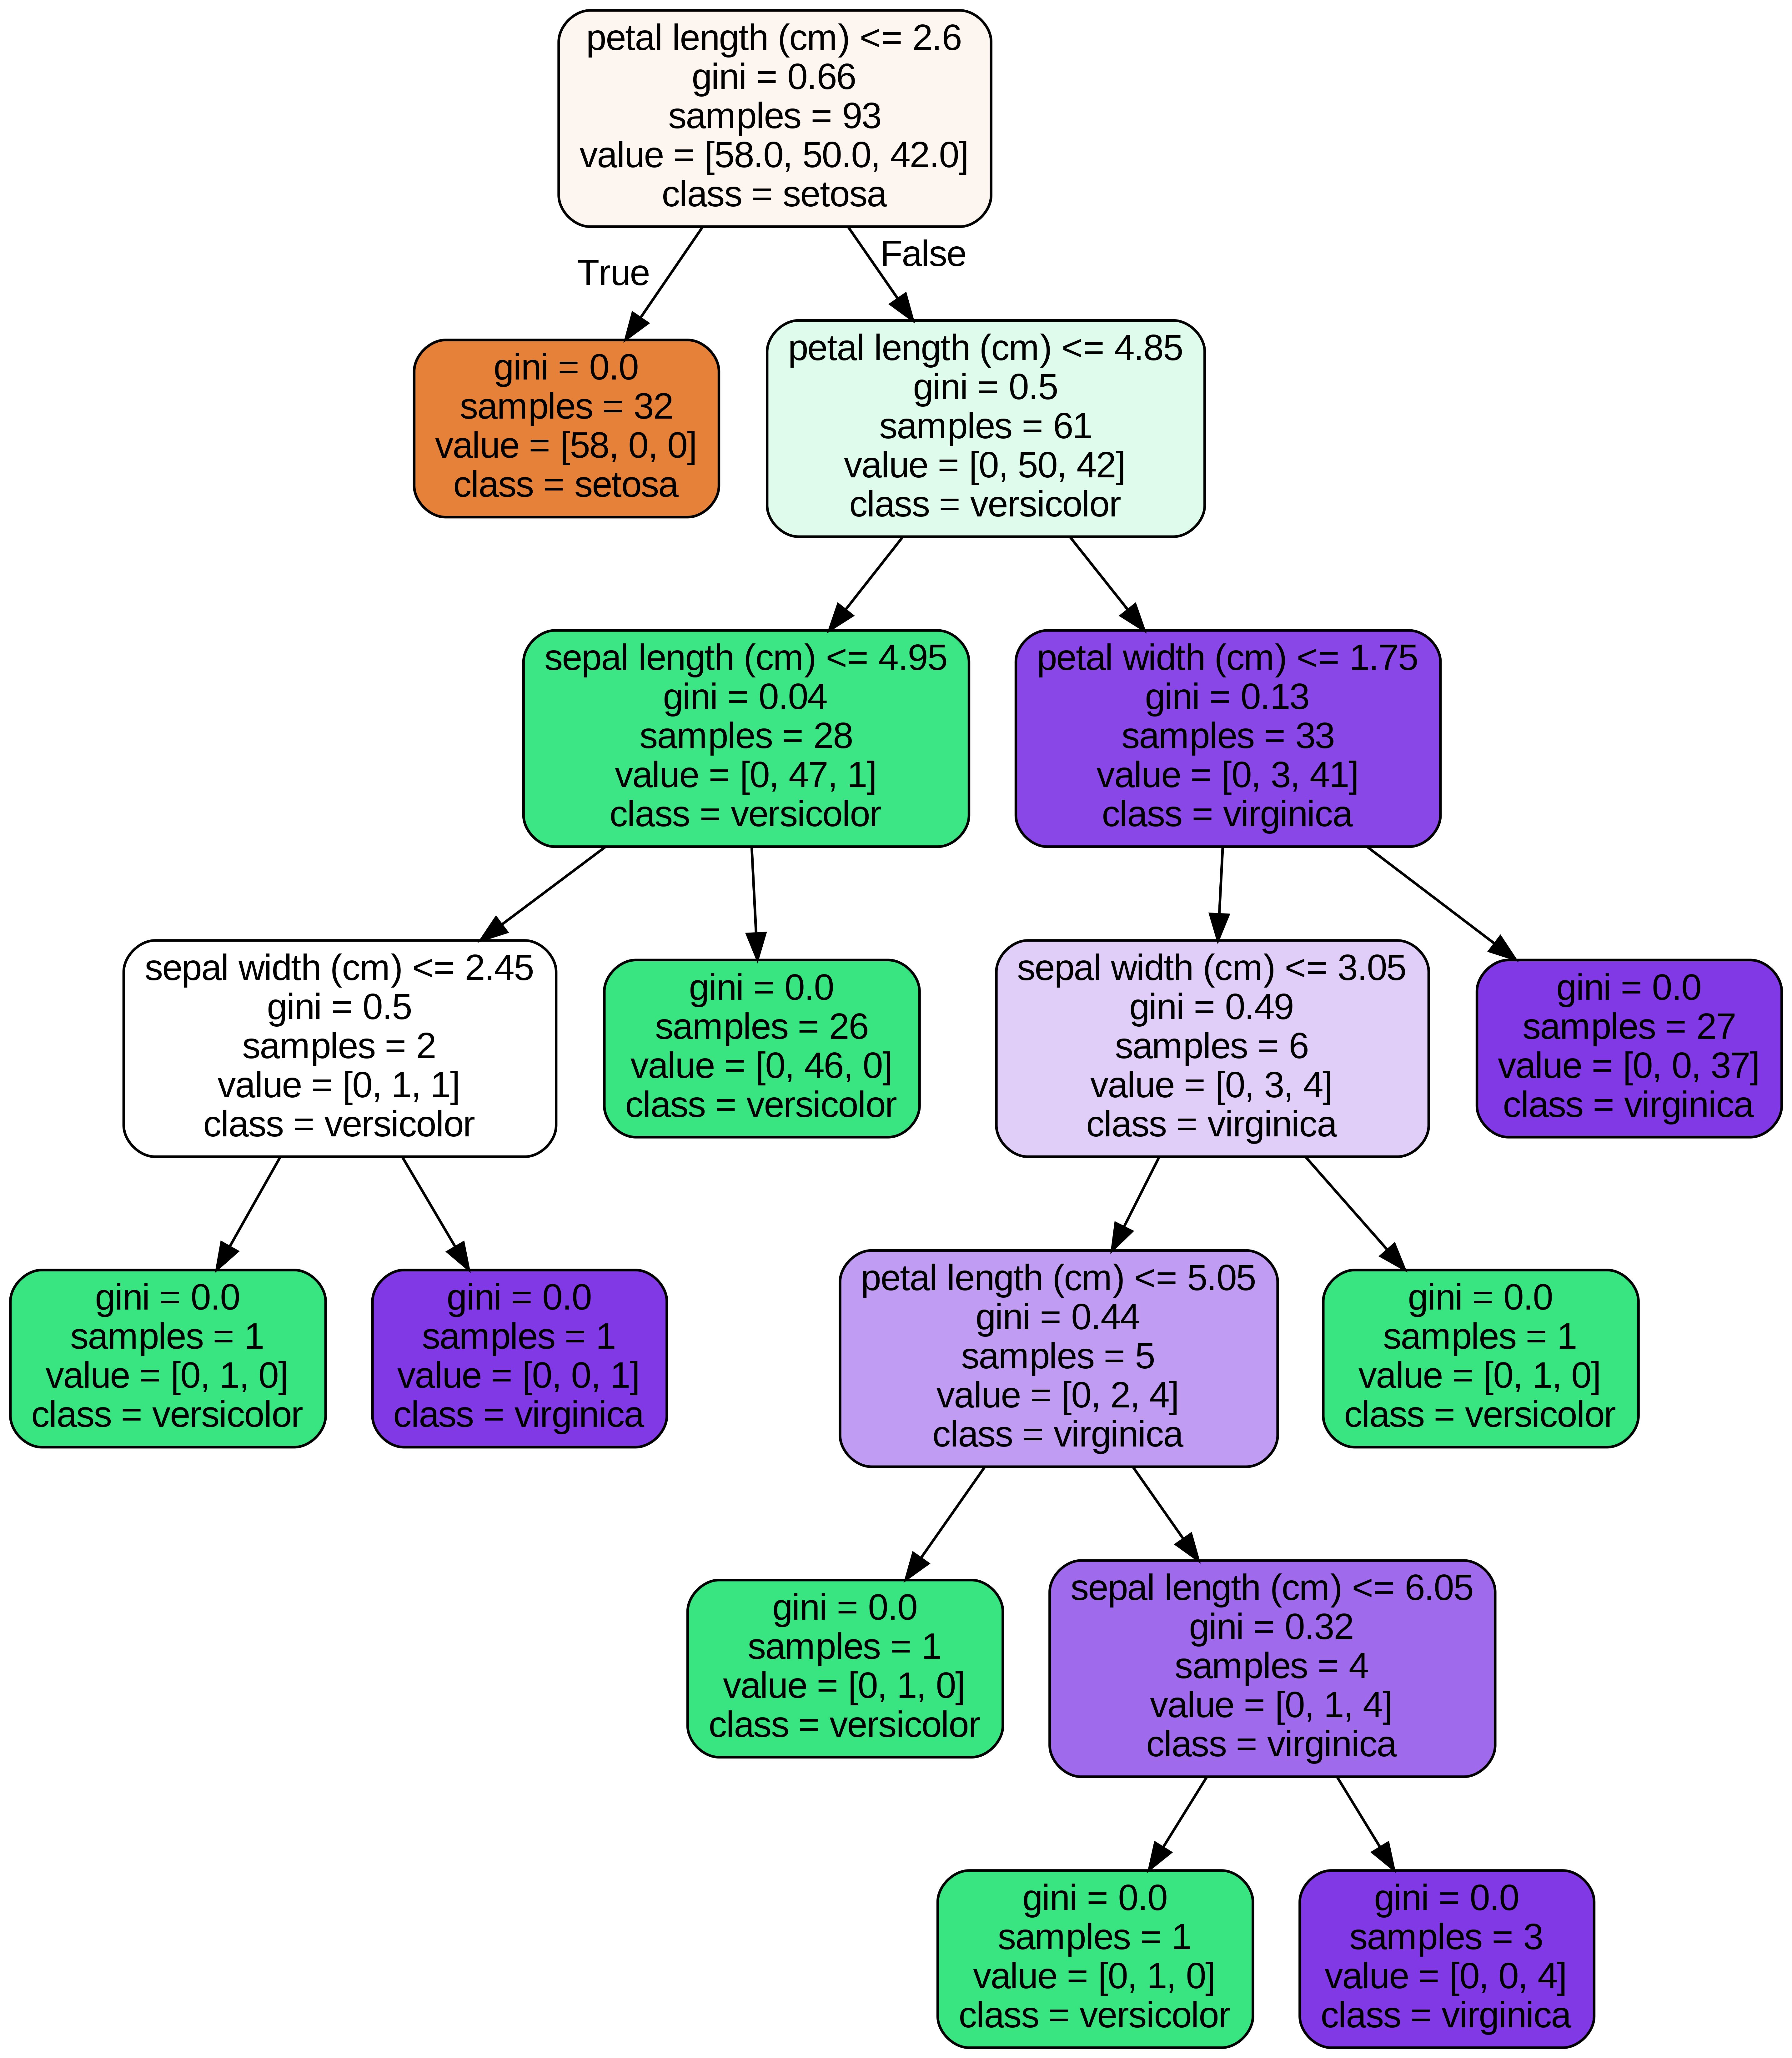

In [ ]:
# Display image
from IPython.display import Image
Image(filename = 'images/RF_1b.png')

In [ ]:
print('The depth of this tree is:', estimator.tree_.max_depth)

The depth of this tree is: 6


#### NOTE: The decision trees are different